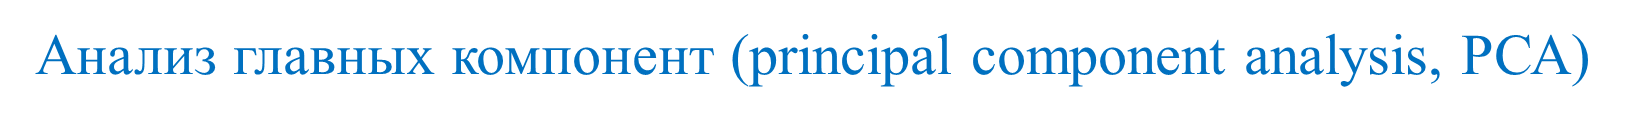

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Создаем датафрейм
df = pd.read_csv("loan_approval_dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [3]:
from sklearn import preprocessing
my_label = preprocessing.LabelEncoder()

df[ ' loan_status' ]= my_label.fit_transform(df[ ' loan_status' ])
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,1
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,0
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,1
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,0


In [4]:
X, y = df.iloc[:,[4, 5, 7, 8]].values, df.iloc[:,12].values
X1_scaled = scale(X)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1_scaled, y, random_state=0,  test_size = 0.40)
X1_scaled

array([[ 1.61797904,  1.63305171,  1.03279241, -0.78005754],
       [-0.34174956, -0.32441406, -1.06105118, -0.7339241 ],
       [ 1.4398219 ,  1.61093345, -0.54484044, -0.05730028],
       ...,
       [ 0.51340474,  0.96950399, -0.82904635, -0.96459131],
       [-0.34174956, -0.25805929,  1.04439265,  0.11185568],
       [ 1.47545332,  1.61093345,  0.04097176,  1.58812583]])

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)


knn = KNeighborsClassifier(n_neighbors = 7, metric='minkowski')
# Уменьшение размерности данных
X_train_pca = pca.fit_transform(X1_train)
X_test_pca = pca.transform(X1_test)
# Классифицировать данные после уменьшения размерности

knn_= knn.fit(X_train_pca, y1_train)

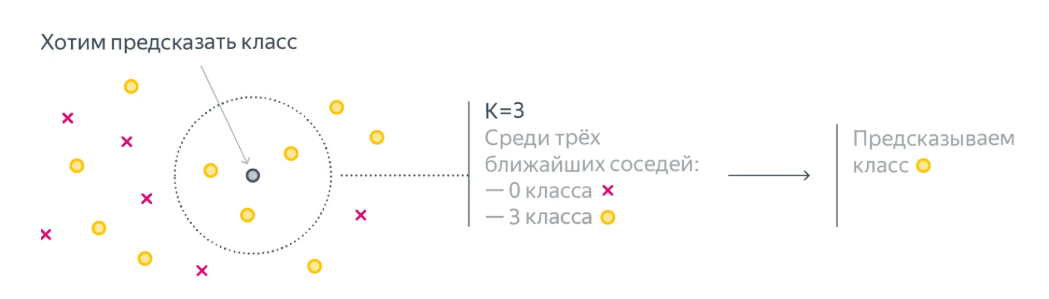

Коэффициент объяснённой дисперсии каждой главной компоненты, доступный через переменную explained_variance_ratio_, указывает долю дисперсии датасета, лежащей вдоль оси каждой главной компоненты.

In [6]:
pca = PCA(n_components = None)
X_train_pca = pca.fit_transform(X1_train)
# Просмотр дисперсионного вклада
pca.explained_variance_ratio_

array([0.61258718, 0.24943652, 0.12007208, 0.01790422])

In [7]:
y_pred_ = knn.predict(X_test_pca)
print('Чиcлo ошибочно классифицированных образцов : %d' % (y1_test != y_pred_).sum())

Чиcлo ошибочно классифицированных образцов : 100


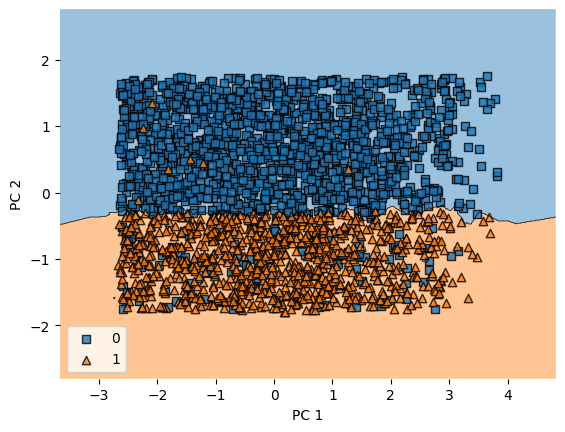

In [8]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

# Визуализировать результаты классификации

plot_decision_regions(X_train_pca[:,[0,1]], y1_train, clf= knn_, legend=2)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc = 'lower left')
plt.show();

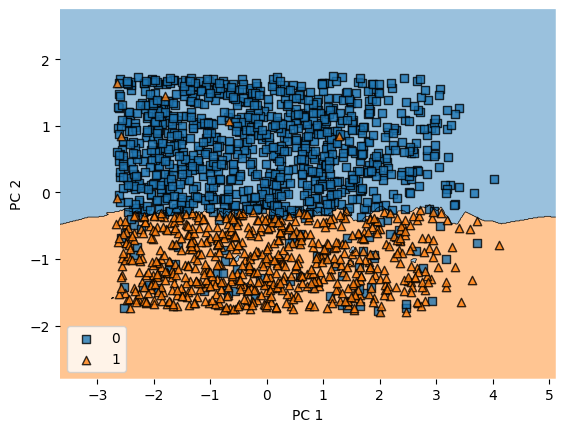

In [ ]:
plot_decision_regions(X_test_pca[:,[0,1]], y1_test, clf= knn_, legend=2)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc = 'lower left')
plt.show();

GridSearchCV инструмент в scikit-learn, который позволяет выполнять исчерпывающий поиск по заданным значениям параметров для оценщика. Это особенно полезно для настройки гиперпараметров, где целью является поиск наилучшего сочетания параметров, обеспечивающего максимальную производительность модели.
В GridSearchCV объект принимает оценщик, сетку параметров и метрику оценки в качестве входных данных и выполняет поиск по сетке по указанным значениям параметров, оценивая производительность модели с использованием выбранной метрики оценки.

KNeighborsClassifier ( n_neighbors = 5 , * , weights = 'uniform' , алгоритм = 'auto' , leaf_size = 30 , p = 2 , metric = 'minkowski' )

Для расчета расстояния между объектами использовать (#metric: "minkowski", "manhattan", "euclidean", "chebyshev"):

- Евклидово расстояние.
- Манхэттенское расстояние.
- Расстояние Чебышева.
- Расстояние Минковского.



